Student ID: strings, categorical
Name: Strings
Grade: categorical, numerical data (discrete)
MathScore: continuous, numerical data 
EnglishScore: continuous, numerical data 
ScienceScore: continuous, numerical data 

Dataset is missing a binary variable
Categorical/binary variable of Gender (if you're assuming they're two genders)

In [4]:
import pandas as pd
import numpy as np
import random

# Set random seed for reproducibility
np.random.seed(0)

# Define possible values for each column
num_students = 250
grades = ['A', 'B', 'C', 'D', 'F']
binary_variable = ['Yes', 'No']

# List of random real names for diversity
names_list = [
    "James", "Mary", "John", "Patricia", "Robert", "Jennifer", "Michael", "Linda",
    "William", "Elizabeth", "David", "Barbara", "Richard", "Susan", "Joseph", "Jessica",
    "Thomas", "Sarah", "Charles", "Karen", "Christopher", "Nancy", "Daniel", "Lisa",
    "Matthew", "Betty", "Anthony", "Margaret", "Mark", "Sandra", "Donald", "Ashley",
    "Steven", "Kimberly", "Paul", "Emily", "Andrew", "Donna", "Joshua", "Michelle",
    "Kenneth", "Dorothy", "Kevin", "Carol", "Brian", "Amanda", "George", "Melissa",
    "Edward", "Deborah"
]

# Expand and shuffle names to get 250 names
expanded_names = (names_list * ((num_students // len(names_list)) + 1))[:num_students]
random.shuffle(expanded_names)

# Generate dataset
data_250_students = {
    'StudentID': [f'ST{str(i).zfill(3)}' for i in range(1, num_students + 1)],
    'Name': expanded_names,
    'Grade': np.random.choice(grades, num_students),
    'MathScore': np.round(np.random.uniform(50, 100, num_students), 2),
    'EnglishScore': np.round(np.random.uniform(50, 100, num_students), 2),
    'ScienceScore': np.round(np.random.uniform(50, 100, num_students), 2),
    'BinaryVariable': np.random.choice(binary_variable, num_students)
}

# Convert the data into a DataFrame
student_df_250 = pd.DataFrame(data_250_students)

# Display the dataframe
student_df_250.head()


,StudentID,Name,Grade,MathScore,EnglishScore,ScienceScore,BinaryVariable
0,ST001,Linda,F,59.31,96.25,76.75,Yes
1,ST002,Mary,A,97.22,52.30,70.21,No
2,ST003,Emily,D,86.98,61.63,76.21,Yes
3,ST004,Nancy,D,74.52,67.43,68.25,Yes
4,ST005,Paul,D,61.37,90.75,59.53,Yes


Keep in mind that the variables are randomly generated so there may or may not be a correlation that you might expect. 

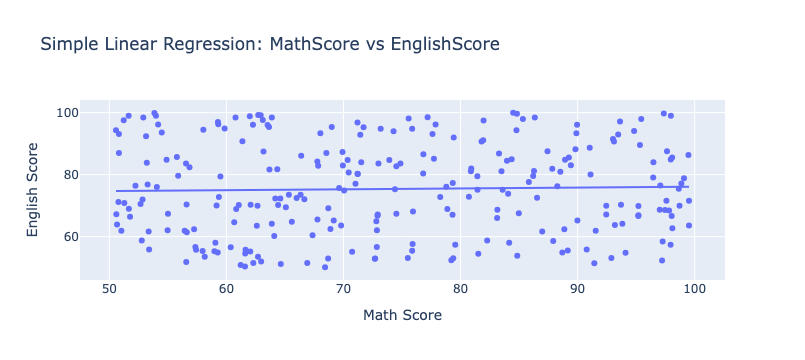

                            OLS Regression Results                            
Dep. Variable:           EnglishScore   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.1947
Date:                Fri, 08 Nov 2024   Prob (F-statistic):              0.659
Time:                        14:27:22   Log-Likelihood:                -1027.1
No. Observations:                 250   AIC:                             2058.
Df Residuals:                     248   BIC:                             2065.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         73.3278      4.799     15.281      0.0

In [8]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import plotly.express as px

# Assuming student_df_250 is already defined
# Using MathScore as independent variable and EnglishScore as dependent variable
X = student_df_250['MathScore']
Y = student_df_250['EnglishScore']

# Add a constant for the linear regression model
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(Y, X).fit()
student_df_250['Predicted_EnglishScore'] = model.predict(X)

# Plotting with Plotly Express
fig = px.scatter(student_df_250, x='MathScore', y='EnglishScore', 
                 trendline="ols", title="Simple Linear Regression: MathScore vs EnglishScore",
                 labels={'MathScore': 'Math Score', 'EnglishScore': 'English Score'})
fig.show()

print(model.summary())


What is the dependent variable? 
Math Score

What is the independent variable?
English Score

Null hypthesis?
There is no correlation between mathscore and english score 
H_0: There is no significant association with and alpha pf 0.05 between English scores and math Scores. 
H_a: There is a significant relationship between english score and math score.

What are the key results of this question?
There is no significant relationship between Math Scores and English Scores (we cannot reject the null hypothesis H0).

Suppose there was a significant relationship, how would you interpret this result? 
For every 1 mark increase in math scores they're a 0.0280 increase in english score. (if the slope was negative it would be a negative decrease). 

1.C.a. A Multiple Linear regression using both the continuous and binary variables. 
This is on based on Olivers data

Exposure / (dependent variable) 
Math Scores 

InDependent variable / outcome 
English Score 

Covariates / additional variables 
Science score and fitness test 

What is the hypothesis of this question?
H_0: There is no significant association with and alpha of 0.05 between math score and english score while adjusting for science score and fitness tests. 

H_A:  There is a significant association with and alpha of 0.05 between math score and english score while adjusting for science score and fitness tests. 

Interpretation: There is no significant association between Math Score and English Score when adjusting for fitness test and science score. 

Lets assume there was a significant relationship how would we interpret that?
P-value is less than 0.05
As english score increases by one, the math score increases by 0.065 while adjusting for fitness and science scores. 

The exposure (the independent variable) : English score. 
* first one when you see (Math score ~ English Score)

English scores, math scores, amount of time studying. 

Are people good math also good at english? 

You can compare math and english scores, and you can think that people who study more probasbly have higher english and math scores. 

We are adjusting the variable for math scores, based on english scores. 

remove the third variables by adjusting, so the math scores based on english scores.

Imagine:

every student same test math and english. 

Expect people in grade 12 would do better in both test compared to someone in grade 9. We would look at great 9 compare, look at grade 10 compare. That is how we adjust for it, to eliminate the third varibale that would change the relationship. 

Big Point: Only looking at one relationship in particular for each hypothesis. You add extra variables to add dimension to the hypothesis. 



1.C.b. A A multiple linear regression using a single (non-binary) and binary variables.

Mathscore, english score, 

Dependent Variable: Math Score

Independent Variable: English Score 

covarients: Math club, science club, Drame club
(If you're mathclub, this is the data (compared to not being in it) and if you're in science club this is the data)
Math club = 1 or science club = 1 or they both equal 0. 

Null hypothesis: 
There is no significant association between english score and math score, while adjusting for club and science score. 

Ha: There is a significant association between english score and math score while adjusting for club and science score. 

If it were true 

1.C.ca multiple linear regresssion using interaction with the continuous and binary variables 

interaction: when two variables are intertwined and you know they are intertwined then there is a number (an interactio nvariable) that is taken into account.

If you're in science club you probably do better in science scores. 

Fitness test: binary variable

$y = B_1 \times x + b_2 \times x + B_1*B_2 \times x$
* when fitness is equal to 0, *y = b_1x*

* When fitness is equal to 1, $y = B_1 \times x + b_2 \times x + B_1*B_2 \times x$

Fitness test is binary because it is either pass / value. 

When students fail the fitness test, which corresponds to a value of 0, there is a a 0.071 mark decrease in math score for every 1 mark increase in english score.

